Step 1: Setting Up the Environment

First, ensure you have the required libraries installed:

In [15]:
# !pip install tensorflow opencv-python-headless numpy matplotlib

Step 2: Importing Libraries

In [16]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
# ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator # marked as deprecated in newer TF version
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

Step 3: Preparing the Dataset

For OCR, you can use the MNIST dataset for digit recognition. For more complex text, you might need a custom dataset.

In [17]:
mnist = tf.keras.datasets.mnist

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to add a channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Step 3.1. Data Augmentation

Increase the variety of training data by applying transformations such as rotation, scaling, translation, and noise addition to the MNIST dataset.

In [18]:
# not in use
'''
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Fit the data generator to the training data
datagen.fit(X_train)
'''

'\ndatagen = ImageDataGenerator(\n    rotation_range=10,\n    width_shift_range=0.1,\n    height_shift_range=0.1,\n    zoom_range=0.1\n)\n\n# Fit the data generator to the training data\ndatagen.fit(X_train)\n'

Step 4: Building the Model

Create a Convolutional Neural Network (CNN) model for digit recognition.

In [19]:
# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 11, 11, 64)      

Step 5: Training the Model

Train the CNN model on the MNIST dataset.

In [20]:
# Set up callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
#early_stopping
#model_checkpoint

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, model_checkpoint]
                    )


Epoch 1/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2473 - accuracy: 0.9235 - val_loss: 0.0978 - val_accuracy: 0.9689
Epoch 2/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1032 - accuracy: 0.9693 - val_loss: 0.0577 - val_accuracy: 0.9832
Epoch 3/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0831 - accuracy: 0.9745 - val_loss: 0.0562 - val_accuracy: 0.9850
Epoch 4/50
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0707 - accuracy: 0.9788 - val_loss: 0.0494 - val_accuracy: 0.9869
Epoch 5/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0645 - accuracy: 0.9802 - val_loss: 0.0455 - val_accuracy: 0.9867
Epoch 6/50
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0562 - accuracy: 0.9829 - val_loss: 0.0412 - val_accuracy: 0.9888
Epoch 7/50
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.0385 -

Step 6: Evaluating the Model

Evaluate the model to see its performance.

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')
model.save('improved_model_20240809.keras')

313/313 [==============================] - 1s 4ms/step - loss: 0.0362 - accuracy: 0.9901
Accuracy: 0.9901000261306763


Also make a plot

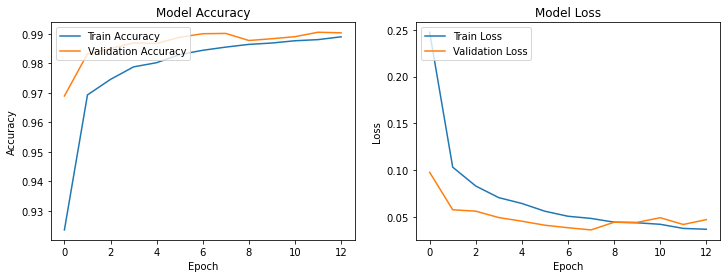

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

The best epoch is Epoch 7, which has the lowest validation loss of 0.0398 and a high validation accuracy of 0.9912.

To evaluate the model at this specific epoch, you should load the best model saved by the ModelCheckpoint callback, which already saves the model with the lowest validation loss.

In [23]:
load_model = tf.keras.models.load_model

# Load the best model
best_model = load_model('improved_model_20240809.keras')

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Best Model Accuracy: {accuracy}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0362 - accuracy: 0.9901
Best Model Accuracy: 0.9901000261306763


Step 7: Using the Model for Prediction

You can use the trained model to make predictions on new images.

In [24]:
# Load an image (example image path: 'digit.png')
image = cv2.imread('C:/Users/OP9020/Documents/Python-OpenCV-test/src/handwriting_image/digit-5.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image = image / 255.0
image = image.reshape(-1, 28, 28, 1)

# Make a prediction
prediction = model.predict(image)
predicted_class = np.argmax(prediction, axis=1)
print(f'Predicted Class: {predicted_class[0]}')

1/1 [==============================] - 0s 85ms/step
Predicted Class: 8


Step 8: Visualizing the Prediction

Display the input image and its predicted class.

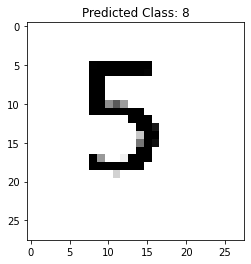

In [25]:
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Class: {predicted_class[0]}')
plt.show()

Step 9: Integrating with PyQt6 (Optional)

If you want to integrate this OCR with a PyQt6 GUI, you can refer to the previous steps provided for setting up a PyQt6 application and adapting the prediction and visualization code accordingly.

This guide provides a basic framework for OCR using Keras, TensorFlow, and OpenCV. For more advanced topics such as handwriting recognition or using more complex datasets, you can look for specific tutorials and datasets that fit your needs.